In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data.csv')

# Ensure the column containing PM2.5 is named correctly and has no missing values
df = df.dropna(subset=['PM2.5'])

# Group by state and calculate the mean PM2.5 concentration
avg_pm25_by_state = df.groupby('state')['PM2.5'].mean()

# Find the state with the highest average PM2.5 concentration
max_pm25_state = avg_pm25_by_state.idxmax()
max_pm25_value = avg_pm25_by_state.max()

print(f"The state with the highest average PM2.5 concentration is {max_pm25_state} with an average of {max_pm25_value:.2f}.")

The state with the highest average PM2.5 concentration is Delhi with an average of 104.10.


In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data.csv')
# Convert Date column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter for the year 2023 and PM2.5 levels > 300
df_2023_hazardous = df[(df['Timestamp'].dt.year == 2023) & (df['PM2.5'] > 300)]

# Group by state and count the number of hazardous days
hazardous_days_by_state = df_2023_hazardous.groupby('state').size()

# Find the state with the maximum count of hazardous days
max_hazardous_state = hazardous_days_by_state.idxmax()
max_hazardous_days = hazardous_days_by_state.max()

print(f"The state with the most hazardous PM2.5 days in 2023 is {max_hazardous_state} with {max_hazardous_days} days.")

The state with the most hazardous PM2.5 days in 2023 is Delhi with 470 days.


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data.csv')
# Convert Date column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter for the year 2023
df_2023 = df[df['Timestamp'].dt.year == 2023]

# Group by state and calculate the standard deviation of PM2.5
variability_by_state = df_2023.groupby('state')['PM2.5'].std()

# Find the state with the highest variability
max_variability_state = variability_by_state.idxmax()
max_variability_value = variability_by_state.max()

print(f"The state with the highest variability in PM2.5 levels in 2023 is {max_variability_state} with a standard deviation of {max_variability_value:.2f}.")

The state with the highest variability in PM2.5 levels in 2023 is Delhi with a standard deviation of 82.80.


In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data.csv')
# Convert Date column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter for the years 2020 and 2021
df_covid_period = df[df['Timestamp'].dt.year.isin([2020, 2021])]

# Group by state and calculate the mean PM2.5 level
avg_pm25_covid = df_covid_period.groupby('state')['PM2.5'].mean()

# Find the state with the lowest average PM2.5 level
min_pm25_state = avg_pm25_covid.idxmin()
min_pm25_value = avg_pm25_covid.min()

print(f"The state with the lowest average PM2.5 level during the Covid period (2020-2021) is {min_pm25_state} with an average of {min_pm25_value:.2f}.")

The state with the lowest average PM2.5 level during the Covid period (2020-2021) is Mizoram with an average of 14.32.


In [10]:
#Temporal Aggregation

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data.csv')

# Convert Date column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter for August 2020
df_aug_2020 = df[(df['Timestamp'].dt.year == 2020) & (df['Timestamp'].dt.month == 8)]

# Find the row with the maximum PM2.5 value
max_pm25_row = df_aug_2020.loc[df_aug_2020['PM2.5'].idxmax()]

# Extract station name and PM2.5 value
station_name = max_pm25_row['station']
max_pm25_value = max_pm25_row['PM2.5']

print(f"The station that recorded the highest PM2.5 value in August 2020 is {station_name} with a value of {max_pm25_value:.2f}.")

The station that recorded the highest PM2.5 value in August 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with a value of 805.51.


In [1]:
import pandas as pd
df = pd.read_csv("Data.csv", parse_dates=["Timestamp"])

station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_2018 = df[(df["Timestamp"].dt.year == 2018) & (df["station"] == station_name)]

winter_mask = df_2018["Timestamp"].dt.month.isin([12, 1, 2])
summer_mask = df_2018["Timestamp"].dt.month.isin([3, 4, 5])
monsoon_mask = df_2018["Timestamp"].dt.month.isin([6, 7, 8, 9])

winter_avg = df_2018.loc[winter_mask, "PM2.5"].mean()
summer_avg = df_2018.loc[summer_mask, "PM2.5"].mean()
monsoon_avg = df_2018.loc[monsoon_mask, "PM2.5"].mean()

print("Seasonal Average PM2.5 Concentration in 2018 for", station_name)
print("Winter (Dec-Feb):", winter_avg, "µg/m³")
print("Summer (Mar-May):", summer_avg, "µg/m³")
print("Monsoon (Jun-Sep):", monsoon_avg, "µg/m³")

seasonal_avgs = {"Winter": winter_avg, "Summer": summer_avg, "Monsoon": monsoon_avg}
most_polluted_season = max(seasonal_avgs, key=seasonal_avgs.get)
print("Most polluted season:", most_polluted_season)

Seasonal Average PM2.5 Concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
Winter (Dec-Feb): 67.4923443634478 µg/m³
Summer (Mar-May): nan µg/m³
Monsoon (Jun-Sep): 34.42519611317571 µg/m³
Most polluted season: Winter


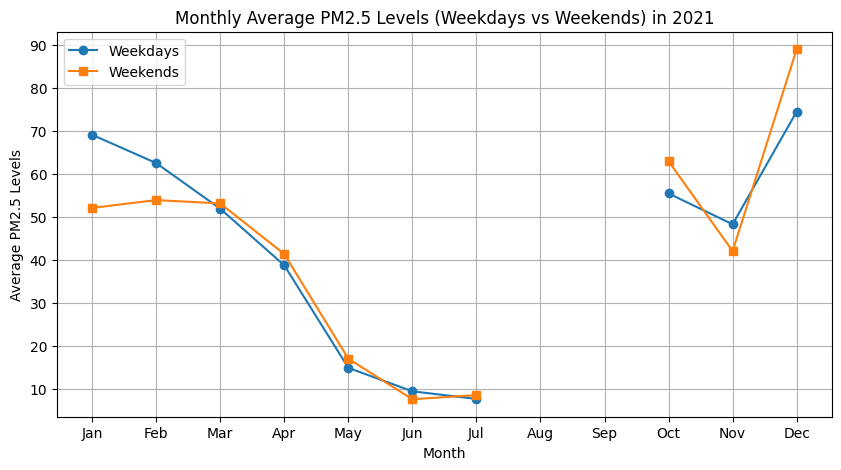

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])

# Filter data for the specified station
station_name = 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
df = df[df['station'] == station_name]

# Extract year and filter for 2021
df = df[df['Timestamp'].dt.year == 2021]

# Add a column for weekdays and weekends
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['Timestamp'].dt.month  # Extract month

df['Weekend'] = df['DayOfWeek'] >= 5  # True for Saturday & Sunday

# Group by month and weekend/weekday, then calculate mean PM2.5
monthly_avg = df.groupby(['Month', 'Weekend'])['PM2.5'].mean().unstack()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg[False], marker='o', linestyle='-', label='Weekdays')
plt.plot(monthly_avg.index, monthly_avg[True], marker='s', linestyle='-', label='Weekends')

plt.xlabel('Month')
plt.ylabel('Average PM2.5 Levels')
plt.title('Monthly Average PM2.5 Levels (Weekdays vs Weekends) in 2021')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid()
plt.show()


In [14]:

#Spatio-temporal aggregation

In [2]:
import pandas as pd
df=pd.read_csv('Data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2022 = df[df['Timestamp'].dt.year == 2022]

df_summer = df_2022[df_2022['Timestamp'].dt.month.isin([3, 4, 5])]
df_monsoon = df_2022[df_2022['Timestamp'].dt.month.isin([6, 7, 8, 9])]

avg_summer = df_summer.groupby('state')['PM2.5'].mean()
avg_monsoon = df_monsoon.groupby('state')['PM2.5'].mean()

df_change = pd.DataFrame({'Summer_PM2.5': avg_summer, 'Monsoon_PM2.5': avg_monsoon})

df_change['Percentage_Change'] = ((df_change['Monsoon_PM2.5'] - df_change['Summer_PM2.5']) / df_change['Summer_PM2.5']) * 100

max_change_state = df_change['Percentage_Change'].abs().idxmax()
max_change_value = df_change['Percentage_Change'].loc[max_change_state]

print(f"State with the most difference in PM2.5: {max_change_state}")
print(f"Percentage change: {max_change_value:.2f}%")

State with the most difference in PM2.5: Assam
Percentage change: -61.18%


C:\Users\pssrg\AppData\Local\Temp\ipykernel_34624\3340818922.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_df['Year'] = delhi_df['Timestamp'].dt.year
C:\Users\pssrg\AppData\Local\Temp\ipykernel_34624\3340818922.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_df['Season'] = delhi_df['Timestamp'].dt.month.apply(get_season)


<Figure size 1000x500 with 0 Axes>

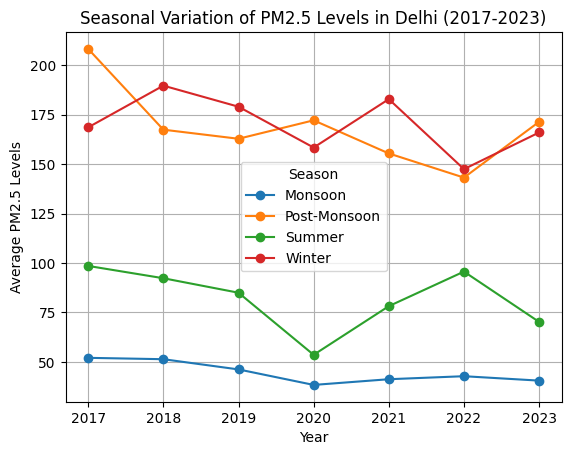

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])

# Filter data for Delhi
delhi_df = df[df['city'] == 'Delhi']

# Extract year and season
delhi_df['Year'] = delhi_df['Timestamp'].dt.year

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

delhi_df['Season'] = delhi_df['Timestamp'].dt.month.apply(get_season)

# Filter data from 2017 to 2023
delhi_df = delhi_df[(delhi_df['Year'] >= 2017) & (delhi_df['Year'] <= 2023)]

# Group by year and season, then calculate mean PM2.5
seasonal_avg = delhi_df.groupby(['Year', 'Season'])['PM2.5'].mean().unstack()

# Plotting
plt.figure(figsize=(10, 5))
seasonal_avg.plot(marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.title('Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)')
plt.legend(title='Season')
plt.grid()
plt.show()


C:\Users\pssrg\AppData\Local\Temp\ipykernel_34624\1189871662.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_df['Year'] = delhi_df['Timestamp'].dt.year
C:\Users\pssrg\AppData\Local\Temp\ipykernel_34624\1189871662.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mumbai_df['Year'] = mumbai_df['Timestamp'].dt.year


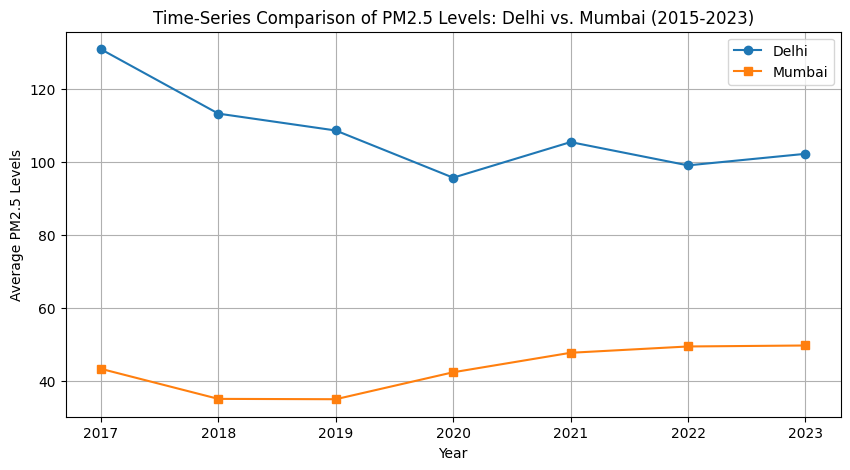

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])

# Filter data for Delhi and Mumbai
delhi_df = df[df['city'] == 'Delhi']
mumbai_df = df[df['city'] == 'Mumbai']

# Extract year
delhi_df['Year'] = delhi_df['Timestamp'].dt.year
mumbai_df['Year'] = mumbai_df['Timestamp'].dt.year

# Filter data from 2015 to 2023
delhi_df = delhi_df[(delhi_df['Year'] >= 2015) & (delhi_df['Year'] <= 2023)]
mumbai_df = mumbai_df[(mumbai_df['Year'] >= 2015) & (mumbai_df['Year'] <= 2023)]

# Group by year and calculate mean PM2.5
delhi_avg = delhi_df.groupby('Year')['PM2.5'].mean()
mumbai_avg = mumbai_df.groupby('Year')['PM2.5'].mean()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(delhi_avg, marker='o', linestyle='-', label='Delhi')
plt.plot(mumbai_avg, marker='s', linestyle='-', label='Mumbai')

plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.title('Time-Series Comparison of PM2.5 Levels: Delhi vs. Mumbai (2015-2023)')
plt.legend()
plt.grid()
plt.show()


In [18]:
#Population-Based

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
air_quality_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])
population_df = pd.read_csv('State_data.csv')  # CSV with 'State' and 'population' columns

# Count the number of monitoring stations per state
stations_per_state = air_quality_df.groupby('state')['station'].nunique()

# Merge with population data (handling different column names)
state_data = stations_per_state.reset_index().merge(population_df, left_on='state', right_on='State')

# Calculate stations per million people
state_data['stations_per_million'] = state_data['station'] / (state_data['Population'] / 1e6)

# Find the state with the highest number of monitoring stations relative to its population
max_state = state_data.loc[state_data['stations_per_million'].idxmax()]
print(f"State with highest monitoring stations per million: {max_state['State']} ({max_state['stations_per_million']:.2f} stations per million)")


State with highest monitoring stations per million: Chandigarh (2.84 stations per million)


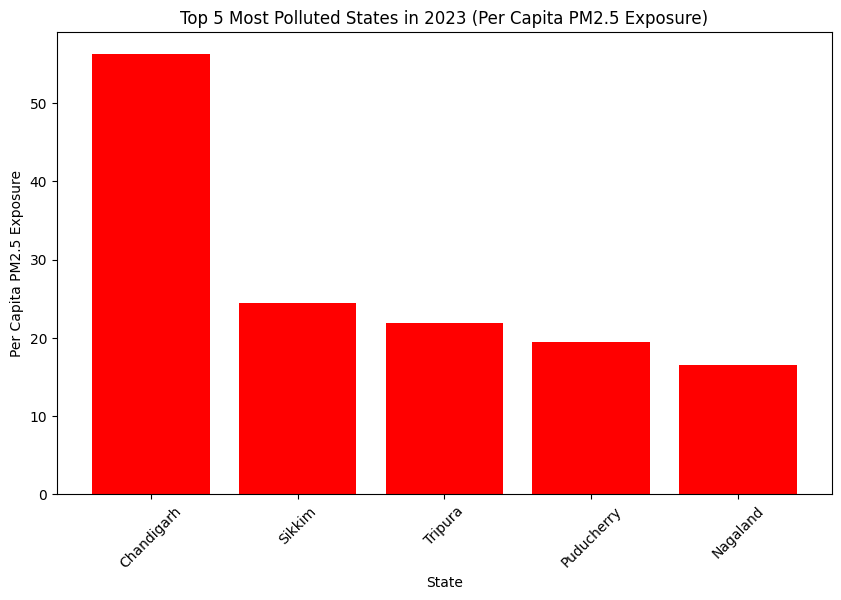

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
air_quality_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])
population_df = pd.read_csv('State_data.csv')  # CSV with 'State' and 'population' columns

# Filter data for 2023
air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year == 2023]

# Calculate average PM2.5 per state
pm25_per_state = air_quality_df.groupby('state')['PM2.5'].mean()

# Merge with population data (handling different column names)
state_data = pm25_per_state.reset_index().merge(population_df, left_on='state', right_on='State')

# Calculate per capita PM2.5 exposure
state_data['pm25_per_capita'] = state_data['PM2.5'] / (state_data['Population'] / 1e6)

# Get top 5 most polluted states
top_5_states = state_data.nlargest(5, 'pm25_per_capita')

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_states['State'], top_5_states['pm25_per_capita'], color='red')
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States in 2023 (Per Capita PM2.5 Exposure)')
plt.xticks(rotation=45)
plt.show()

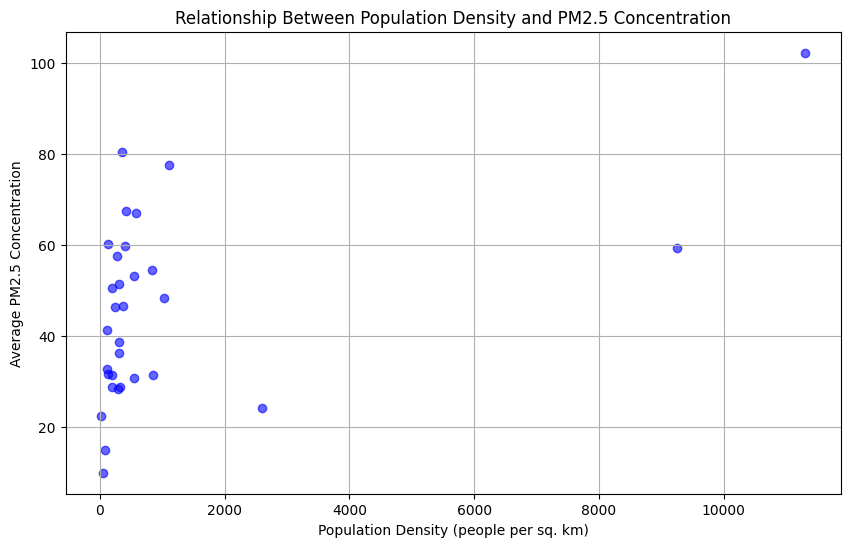

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
air_quality_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])
population_df = pd.read_csv('State_data.csv')  # CSV with 'State', 'Population', and 'Area' columns

# Filter data for 2023
air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year == 2023]

# Calculate average PM2.5 per state
pm25_per_state = air_quality_df.groupby('state')['PM2.5'].mean()

# Merge with population data (handling different column names)
state_data = pm25_per_state.reset_index().merge(population_df, left_on='state', right_on='State')

# Calculate population density
state_data['Population Density'] = state_data['Population'] / state_data['Area (km2)']

# Scatter plot for population density vs. average PM2.5 concentration
plt.figure(figsize=(10, 6))
plt.scatter(state_data['Population Density'], state_data['PM2.5'], color='blue', alpha=0.6)
plt.xlabel('Population Density (people per sq. km)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Relationship Between Population Density and PM2.5 Concentration')
plt.grid(True)
plt.show()

In [22]:
#Area Based

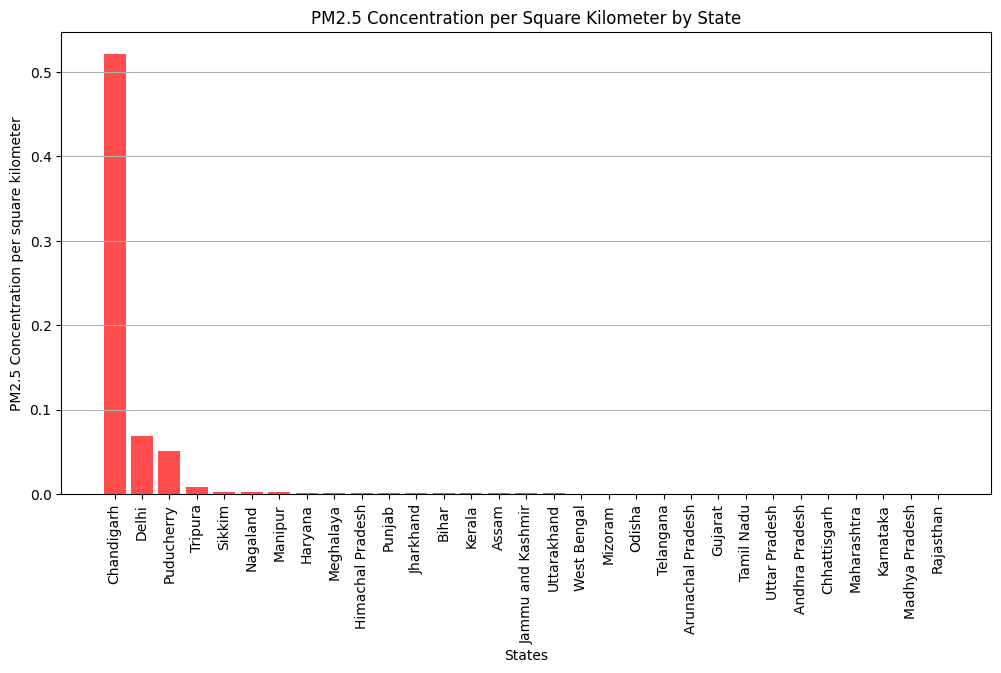

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
air_quality_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])
population_df = pd.read_csv('State_data.csv')  # CSV with 'State', 'Population', and 'Area' columns

# Filter data for 2023
air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year == 2023]

# Calculate average PM2.5 per state
pm25_per_state = air_quality_df.groupby('state')['PM2.5'].mean()

# Merge with population data (handling different column names)
state_data = pm25_per_state.reset_index().merge(population_df, left_on='state', right_on='State')

# Calculate PM2.5 concentration per square kilometer
state_data['PM2.5 per sq km'] = state_data['PM2.5'] / state_data['Area (km2)']

# Sort states by PM2.5 concentration per square kilometer
top_polluted_states = state_data.sort_values(by='PM2.5 per sq km', ascending=False)

# Bar plot for PM2.5 concentration per square kilometer
plt.figure(figsize=(12, 6))
plt.bar(top_polluted_states['State'], top_polluted_states['PM2.5 per sq km'], color='red', alpha=0.7)
plt.xlabel('States')
plt.ylabel('PM2.5 Concentration per square kilometer')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


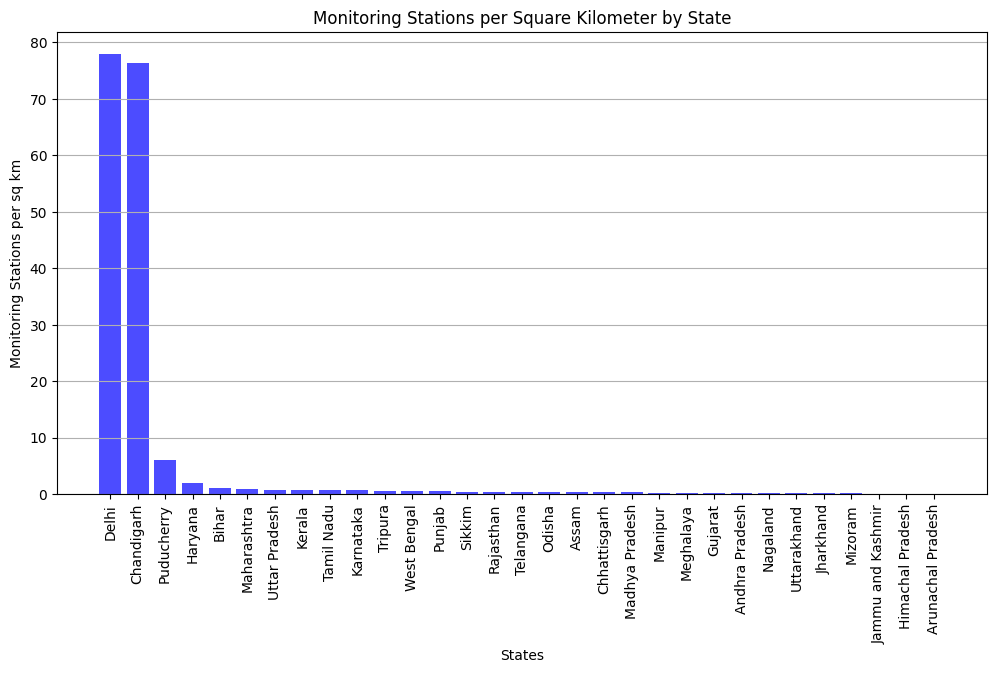

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
air_quality_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])
population_df = pd.read_csv('State_data.csv')  # CSV with 'State', 'Population', and 'Area' columns

# Count the number of monitoring stations per state
stations_per_state = air_quality_df.groupby('state')['state'].count()
stations_per_state = stations_per_state.rename('Number of Stations')

# Merge with population data (handling different column names)
state_data = stations_per_state.reset_index().merge(population_df, left_on='state', right_on='State')

# Calculate monitoring station density (stations per square kilometer)
state_data['Stations per sq km'] = state_data['Number of Stations'] / state_data['Area (km2)']

# Sort states by monitoring station density
top_station_density_states = state_data.sort_values(by='Stations per sq km', ascending=False)

# Bar plot for monitoring stations per sq km
plt.figure(figsize=(12, 6))
plt.bar(top_station_density_states['State'], top_station_density_states['Stations per sq km'], color='blue', alpha=0.7)
plt.xlabel('States')
plt.ylabel('Monitoring Stations per sq km')
plt.title('Monitoring Stations per Square Kilometer by State')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


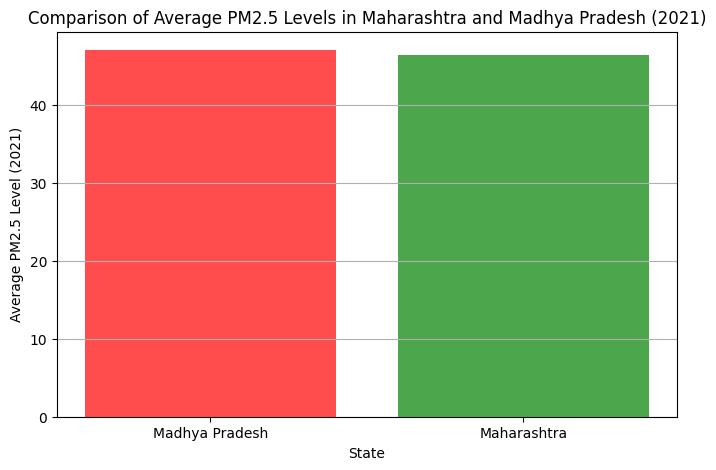

            State      PM2.5  Population Density
0  Madhya Pradesh  47.095952          235.608557
1     Maharashtra  46.440044          365.192023


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
air_quality_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])
population_df = pd.read_csv('State_data.csv')  # CSV with 'State', 'Population', and 'Area' columns

# Filter data for 2021
air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year == 2021]

# Filter for Maharashtra and Madhya Pradesh
states_of_interest = ['Maharashtra', 'Madhya Pradesh']
state_pm25 = air_quality_df[air_quality_df['state'].isin(states_of_interest)]

# Calculate average PM2.5 per state
pm25_avg = state_pm25.groupby('state')['PM2.5'].mean().reset_index()

# Merge with population and area data
pm25_avg = pm25_avg.merge(population_df, left_on='state', right_on='State')

# Calculate population density 
pm25_avg['Population Density'] = pm25_avg['Population'] / pm25_avg['Area (km2)']

# Bar plot comparing PM2.5 levels
plt.figure(figsize=(8, 5))
plt.bar(pm25_avg['State'], pm25_avg['PM2.5'], color=['red', 'green'], alpha=0.7)
plt.xlabel('State')
plt.ylabel('Average PM2.5 Level (2021)')
plt.title('Comparison of Average PM2.5 Levels in Maharashtra and Madhya Pradesh (2021)')
plt.grid(axis='y')
plt.show()

# Analyze population density impact
print(pm25_avg[['State', 'PM2.5', 'Population Density']])

In [26]:
#Funding Based

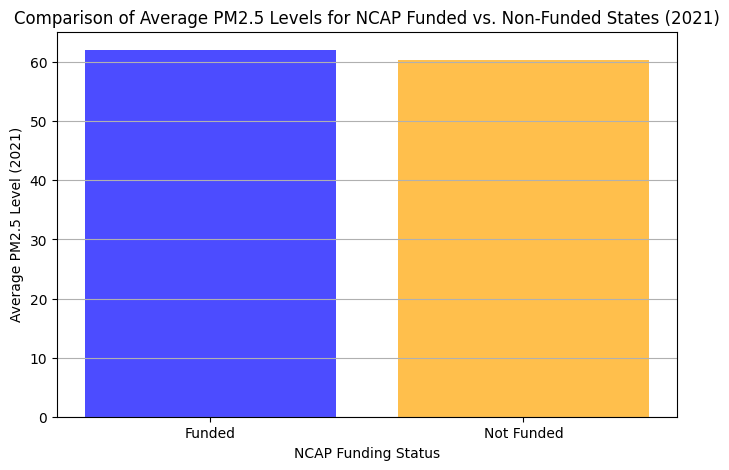

  NCAP_Funded      PM2.5
0      Funded  62.055055
1  Not Funded  60.326211


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
air_quality_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])
population_df = pd.read_csv('State_data.csv')  # CSV with 'State', 'Population', and 'Area' columns
ncap_funding_df = pd.read_csv('NCAP_Funding.csv')  # CSV with NCAP funding information

# Filter data for 2021
air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year == 2021]

# Identify states that received NCAP funding
ncap_states = ncap_funding_df['State'].unique()

# Categorize states into funded and non-funded
air_quality_df['NCAP_Funded'] = air_quality_df['state'].apply(lambda x: 'Funded' if x in ncap_states else 'Not Funded')

# Calculate average PM2.5 for funded and non-funded states
pm25_avg = air_quality_df.groupby('NCAP_Funded')['PM2.5'].mean().reset_index()

# Bar plot comparing PM2.5 levels
plt.figure(figsize=(8, 5))
plt.bar(pm25_avg['NCAP_Funded'], pm25_avg['PM2.5'], color=['blue', 'orange'], alpha=0.7)
plt.xlabel('NCAP Funding Status')
plt.ylabel('Average PM2.5 Level (2021)')
plt.title('Comparison of Average PM2.5 Levels for NCAP Funded vs. Non-Funded States (2021)')
plt.grid(axis='y')
plt.show()

# Display results
print(pm25_avg)


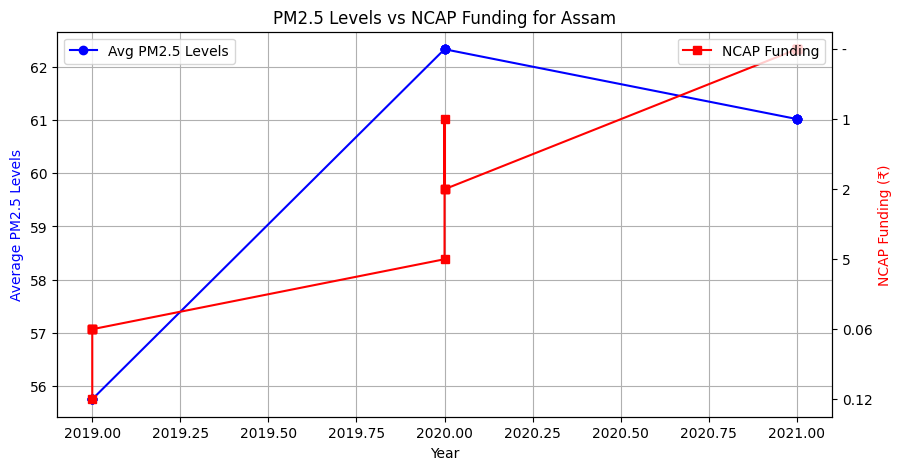

    Year      PM2.5  State Funding
0   2019  55.752773  Assam    0.12
1   2019  55.752773  Assam    0.06
2   2019  55.752773  Assam    0.06
3   2019  55.752773  Assam    0.06
4   2019  55.752773  Assam    0.06
5   2020  62.329410  Assam       5
6   2020  62.329410  Assam       2
7   2020  62.329410  Assam       1
8   2020  62.329410  Assam       2
9   2020  62.329410  Assam       2
10  2021  61.017780  Assam       -
11  2021  61.017780  Assam       -
12  2021  61.017780  Assam       -
13  2021  61.017780  Assam       -
14  2021  61.017780  Assam       -


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
air_quality_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])
ncap_funding_df = pd.read_csv('NCAP_Funding.csv')  # CSV with NCAP funding information

# Filter data for Assam
air_quality_df = air_quality_df[(air_quality_df['state'] == 'Assam')]
ncap_funding_df = ncap_funding_df[ncap_funding_df['State'] == 'Assam']

# Aggregate PM2.5 levels by year
air_quality_df['Year'] = air_quality_df['Timestamp'].dt.year
pm25_avg = air_quality_df.groupby('Year')['PM2.5'].mean().reset_index()

# Extract NCAP funding by year
funding_years = [col for col in ncap_funding_df.columns if 'FY' in col]
ncap_funding = pd.melt(ncap_funding_df, id_vars=['State'], value_vars=funding_years, var_name='Year', value_name='Funding')
ncap_funding['Year'] = ncap_funding['Year'].str.extract('(\\d{4})').astype(float)
ncap_funding = ncap_funding.dropna()

# Merge datasets
merged_df = pd.merge(pm25_avg, ncap_funding, on='Year', how='inner')

# Plot time series
twin_fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.plot(merged_df['Year'], merged_df['PM2.5'], 'b-o', label='Avg PM2.5 Levels')
ax2.plot(merged_df['Year'], merged_df['Funding'], 'r-s', label='NCAP Funding')

ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5 Levels', color='b')
ax2.set_ylabel('NCAP Funding (₹)', color='r')
ax1.set_title('PM2.5 Levels vs NCAP Funding for Assam')
ax1.grid()

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# Display results
print(merged_df)


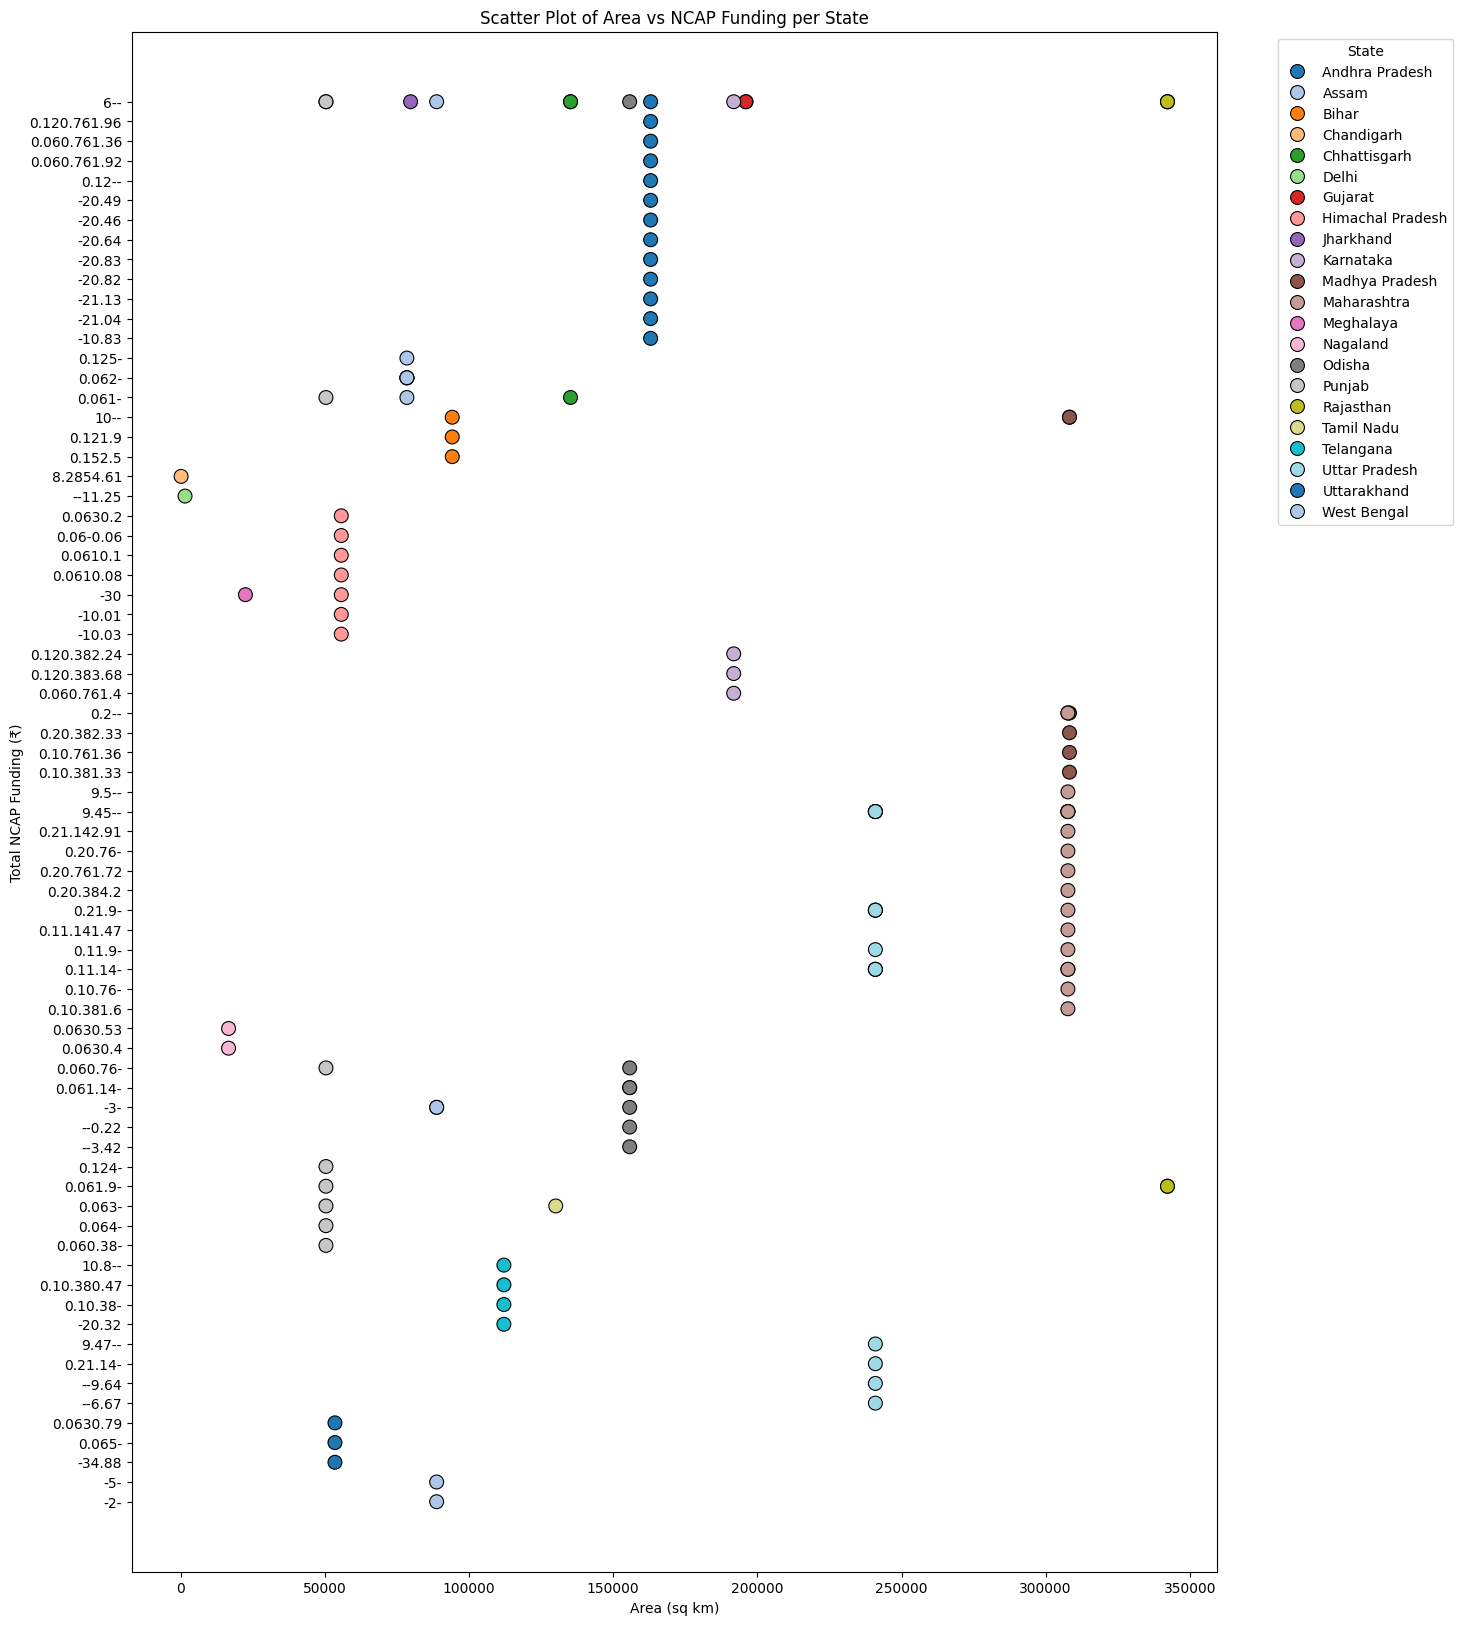

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
state_data = pd.read_csv('State_data.csv')  # Contains 'State' and 'Area' columns
ncap_funding_df = pd.read_csv('NCAP_Funding.csv')  # Contains 'State' and funding columns

# Sum total funding received per state
funding_columns = [col for col in ncap_funding_df.columns if 'FY' in col]
ncap_funding_df['Total_Funding'] = ncap_funding_df[funding_columns].sum(axis=1)

# Merge datasets to get 'Area' and 'Total_Funding'
merged_df = pd.merge(ncap_funding_df[['State', 'Total_Funding']], state_data[['State', 'Area (km2)']], on='State')

# Create scatter plot
plt.figure(figsize=(14, 20))
sns.scatterplot(data=merged_df, x='Area (km2)', y='Total_Funding', hue='State', palette='tab20', s=100, edgecolor='black')

# Labels and title
plt.xlabel('Area (sq km)')
plt.ylabel('Total NCAP Funding (₹)')
plt.title('Scatter Plot of Area vs NCAP Funding per State')

# Move legend outside
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


In [30]:
#Miscellaneous Questions

In [31]:
import pandas as pd

# Load dataset
air_quality_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])

# Filter data for 2023
air_quality_df = air_quality_df[air_quality_df['Timestamp'].dt.year == 2023]

# Compute the average PM2.5 per city
city_avg_pm25 = air_quality_df.groupby('city')['PM2.5'].mean()

# Identifing the most polluted city
most_polluted_city = city_avg_pm25.idxmax()
print(f"Most polluted city in 2023: {most_polluted_city}")

# Filter data for the most polluted city
city_data = air_quality_df[air_quality_df['city'] == most_polluted_city]

# Count the number of days where PM2.5 > 300 
city_data['Date'] = city_data['Timestamp'].dt.date  # Finding dates
days_above_threshold = city_data.groupby('Date')['PM2.5'].max() > 300
num_hazardous_days = days_above_threshold.sum()

# Calculate percentage of hazardous days
total_days = city_data['Date'].nunique()
percentage_hazardous_days = (num_hazardous_days / total_days) * 100

print(f"Percentage of hazardous days in {most_polluted_city}: {percentage_hazardous_days:.2f}%")


Most polluted city in 2023: Darbhanga
Percentage of hazardous days in Darbhanga: 0.82%


C:\Users\pssrg\AppData\Local\Temp\ipykernel_34624\2007978295.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Date'] = city_data['Timestamp'].dt.date  # Finding dates


C:\Users\pssrg\AppData\Local\Temp\ipykernel_34624\1095046259.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Year'] = delhi_data['Timestamp'].dt.year
C:\Users\pssrg\AppData\Local\Temp\ipykernel_34624\1095046259.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Month'] = delhi_data['Timestamp'].dt.month
C:\Users\pssrg\AppData\Local\Temp\ipykernel_34624\1095046259.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

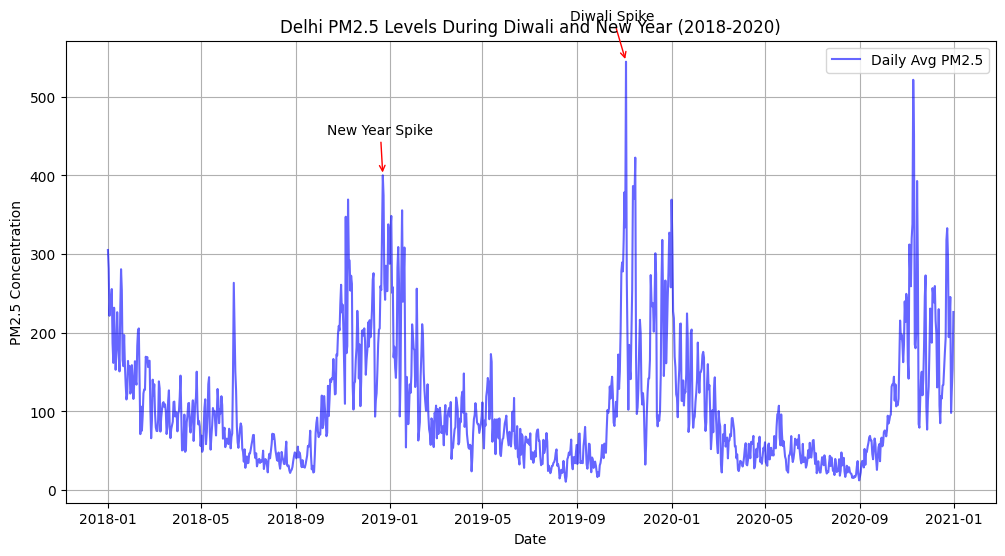

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
air_quality_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])

# Filter data for Delhi and years 2018-2020
delhi_data = air_quality_df[(air_quality_df['city'] == 'Delhi') & 
                            (air_quality_df['Timestamp'].dt.year.isin([2018, 2019, 2020]))]

# Extract month and year
delhi_data['Year'] = delhi_data['Timestamp'].dt.year
delhi_data['Month'] = delhi_data['Timestamp'].dt.month
delhi_data['Date'] = delhi_data['Timestamp'].dt.date  

# Group by date and compute daily average PM2.5
daily_pm25 = delhi_data.groupby(['Date'])['PM2.5'].mean().reset_index()

# Plot time series of PM2.5 levels
plt.figure(figsize=(12, 6))
plt.plot(daily_pm25['Date'], daily_pm25['PM2.5'], label='Daily Avg PM2.5', color='blue', alpha=0.6)

# Highlight Diwali (October-November) and New Year (Dec-Jan 1st week)
diwali_dates = daily_pm25[(daily_pm25['Date'].astype(str).str.contains('-10-|-11-'))]  # October & November
new_year_dates = daily_pm25[(daily_pm25['Date'].astype(str).str.contains('-12-|-01-'))]  # December & January

# Mark Diwali spikes
max_diwali_pm25 = diwali_dates[daily_pm25['PM2.5'] == diwali_dates['PM2.5'].max()]
plt.annotate('Diwali Spike', 
             xy=(max_diwali_pm25['Date'].values[0], max_diwali_pm25['PM2.5'].values[0]), 
             xytext=(-40, 30), textcoords='offset points', 
             arrowprops=dict(arrowstyle='->', color='red'))

# Mark New Year spikes
max_newyear_pm25 = new_year_dates[daily_pm25['PM2.5'] == new_year_dates['PM2.5'].max()]
plt.annotate('New Year Spike', 
             xy=(max_newyear_pm25['Date'].values[0], max_newyear_pm25['PM2.5'].values[0]), 
             xytext=(-40, 30), textcoords='offset points', 
             arrowprops=dict(arrowstyle='->', color='red'))

# Labels and legend
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.title('Delhi PM2.5 Levels During Diwali and New Year (2018-2020)')
plt.legend()
plt.grid(True)
plt.show()


State with highest NCAP funding in 2020: Assam


C:\Users\pssrg\AppData\Local\Temp\ipykernel_34624\2551365713.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_air_quality['Year'] = state_air_quality['Timestamp'].dt.year


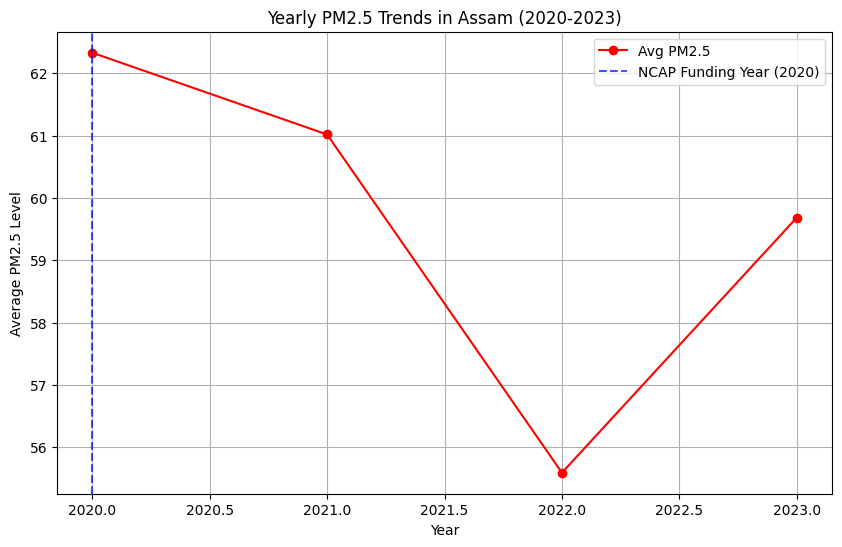

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
air_quality_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])
ncap_funding_df = pd.read_csv('NCAP_Funding.csv')

# Extract NCAP funding for 2020
funding_2020 = ncap_funding_df[['State', 'Amount released during FY 2020-21']].dropna()
funding_2020 = funding_2020.rename(columns={'Amount released during FY 2020-21': 'Funding_2020'})

# Identify the state with the highest funding
highest_funded_state = funding_2020.loc[funding_2020['Funding_2020'].idxmax(), 'State']
print(f"State with highest NCAP funding in 2020: {highest_funded_state}")

# Filter air quality data for this state (2020-2023)
state_air_quality = air_quality_df[(air_quality_df['state'] == highest_funded_state) &
                                   (air_quality_df['Timestamp'].dt.year.isin([2020, 2021, 2022, 2023]))]

# Extract year and calculate yearly average PM2.5 levels
state_air_quality['Year'] = state_air_quality['Timestamp'].dt.year
yearly_avg_pm25 = state_air_quality.groupby('Year')['PM2.5'].mean().reset_index()

# Plot PM2.5 trend over years
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_pm25['Year'], yearly_avg_pm25['PM2.5'], marker='o', linestyle='-', color='red', label='Avg PM2.5')

# Highlight the funding year (2020)
plt.axvline(x=2020, color='blue', linestyle='--', alpha=0.7, label='NCAP Funding Year (2020)')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title(f'Yearly PM2.5 Trends in {highest_funded_state} (2020-2023)')
plt.legend()
plt.grid(True)
plt.show()


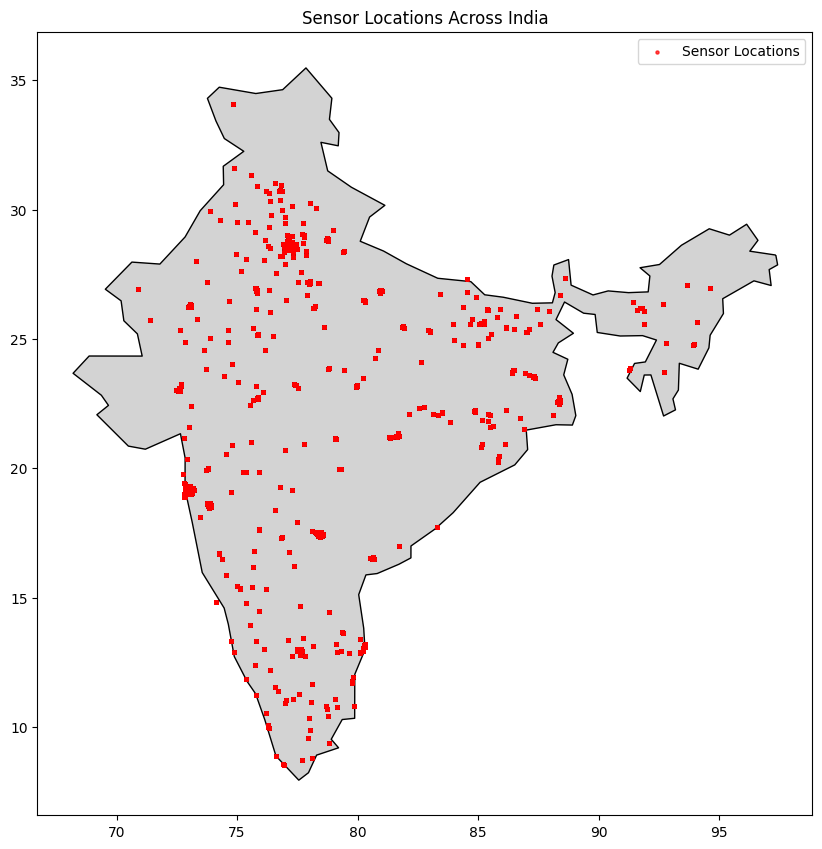

In [4]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load India's map from the Natural Earth dataset
world = gpd.read_file(r"C:\Users\pssrg\Downloads\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp")
india = world[world["ADMIN"] == "India"]

# Load the sensor data
sensor_data = pd.read_csv("Data.csv")

# Check if 'Latitude' and 'Longitude' columns exist
if "latitude" in sensor_data.columns and "longitude" in sensor_data.columns:
    # Create a GeoDataFrame from the sensor data
    gdf_sensors = gpd.GeoDataFrame(
        sensor_data, 
        geometry=gpd.points_from_xy(sensor_data.longitude, sensor_data.latitude),
        crs="EPSG:4326"
    )

    # Plot India and overlay sensor locations
    fig, ax = plt.subplots(figsize=(10, 12))
    india.plot(ax=ax, color="lightgray", edgecolor="black")
    gdf_sensors.plot(ax=ax, color="red", markersize=5, alpha=0.7, label="Sensor Locations")

    # Customize plot
    plt.title("Sensor Locations Across India")
    plt.legend()
    plt.show()
else:
    print("Latitude and Longitude columns not found in Data.csv")



In [35]:
#Tell us something new

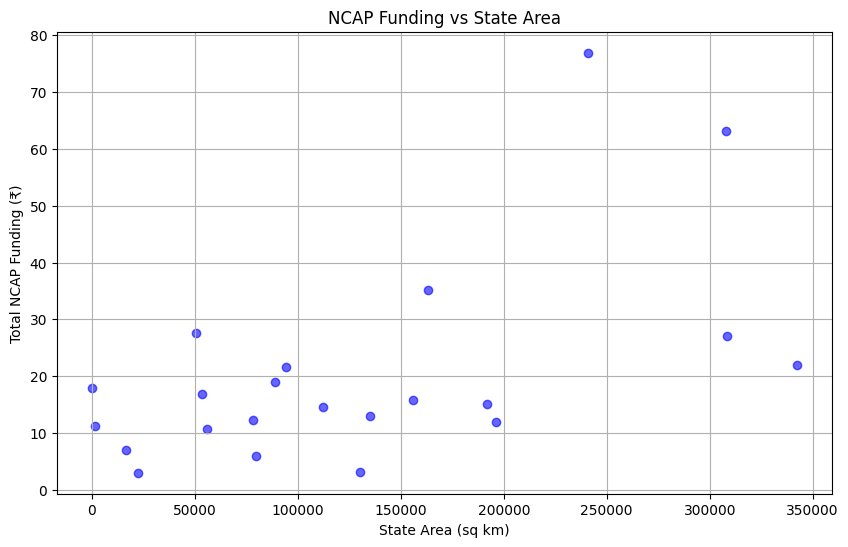

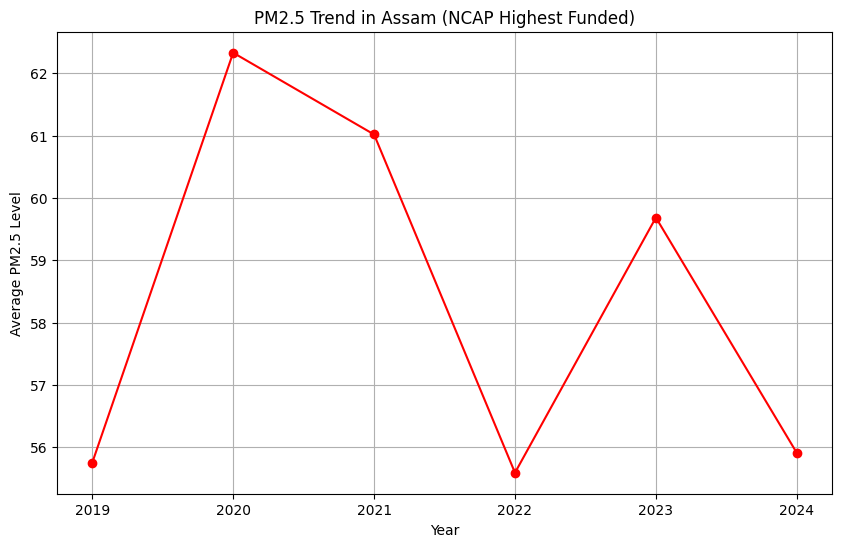

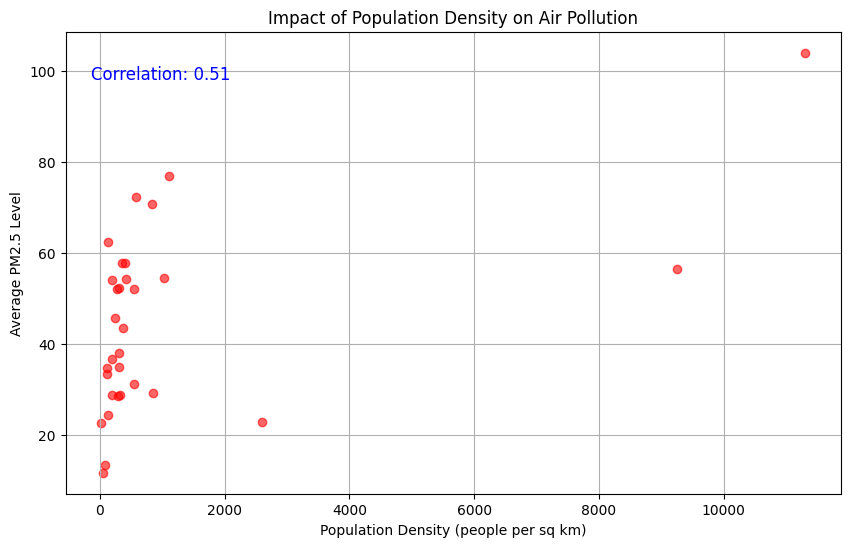

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Load datasets
air_quality_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])
ncap_funding_df = pd.read_csv('NCAP_Funding.csv')
state_data_df = pd.read_csv('State_data.csv')

# Extract year from Timestamp
air_quality_df['Year'] = air_quality_df['Timestamp'].dt.year

# 1. Find the most polluted city in 2023
pm25_2023 = air_quality_df[air_quality_df['Year'] == 2023]
most_polluted_city = pm25_2023.groupby('city')['PM2.5'].mean().idxmax()
highest_pm25 = pm25_2023.groupby('city')['PM2.5'].mean().max()

# 2. Percentage of hazardous days (PM2.5 > 300 µg/m³) in the most polluted city
hazardous_days = pm25_2023[(pm25_2023['city'] == most_polluted_city) & (pm25_2023['PM2.5'] > 300)]
total_days = pm25_2023[pm25_2023['city'] == most_polluted_city]['Timestamp'].nunique()
hazardous_percentage = (len(hazardous_days) / total_days) * 100

# 3. NCAP funding vs pollution reduction
top_funded_state = ncap_funding_df.groupby('State')['Amount released during FY 2020-21'].sum().idxmax()
funding_trends = air_quality_df[air_quality_df['state'] == top_funded_state].groupby('Year')['PM2.5'].mean()

# 4. Scatter plot: State Area vs NCAP Funding
merged_funding_area = pd.merge(ncap_funding_df.groupby('State')['Total fund released'].sum(),
                               state_data_df[['State', 'Area (km2)']], on='State')

plt.figure(figsize=(10, 6))
plt.scatter(merged_funding_area['Area (km2)'], merged_funding_area['Total fund released'], c='blue', alpha=0.6)
plt.xlabel("State Area (sq km)")
plt.ylabel("Total NCAP Funding (₹)")
plt.title("NCAP Funding vs State Area")
plt.grid(True)
plt.show()

# 5. Yearly PM2.5 trend for the highest funded state
plt.figure(figsize=(10, 6))
plt.plot(funding_trends.index, funding_trends.values, marker='o', linestyle='-', color='red')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title(f"PM2.5 Trend in {top_funded_state} (NCAP Highest Funded)")
plt.grid(True)
plt.show()

state_pm25 = air_quality_df.groupby('state')['PM2.5'].mean().reset_index()

# Compute average PM2.5 levels per state
state_pm25 = air_quality_df.groupby('state')['PM2.5'].mean().reset_index()

# Merge without renaming (specifying left and right column names explicitly)
merged_population = pd.merge(state_pm25, state_data_df, left_on='state', right_on='State')

# Calculate population density
merged_population['Population Density'] = merged_population['Population'] / merged_population['Area (km2)']

# Scatter plot: Population Density vs. PM2.5
plt.figure(figsize=(10,6))
plt.scatter(merged_population['Population Density'], merged_population['PM2.5'], c='red', alpha=0.6)
plt.xlabel("Population Density (people per sq km)")
plt.ylabel("Average PM2.5 Level")
plt.title("Impact of Population Density on Air Pollution")
plt.grid(True)

# Show the correlation coefficient
correlation = merged_population[['Population Density', 'PM2.5']].corr().iloc[0,1]
plt.figtext(0.15, 0.8, f"Correlation: {correlation:.2f}", fontsize=12, color="blue")

plt.show()

